以下に学籍番号，氏名の記入をお願いいたします．

# 画像のローパスフィルタの実装（scipy の演習）
ここでは，scipy を使ったフーリエ変換を利用し，画像のローパスフィルタの実装してみましょう．

## opencv のインストール
ご自身の環境にopencv がインストールされていない場合は，pip を使ってインストールします．少し時間がかかります．  
```pip install opencv-python``` でインストールして下さい．

## モジュールのimport 
scipy のフーリエ変換を用いるのでimport します．また，scipy はnumpy に依存しているのでnumpy をimport します．  
他に，画像やフーリエ変換の結果の表示に必要なのでmatplotlib を，画像読み込みに必要なのでcv2（OpenCV）をimport します．

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import fft
import scipy.fftpack as fft
import cv2

## 利用画像の表示
今回利用する画像は信号処理で用いられる標準画像の1つであるマンドリルの画像を用います．読み込んで表示します．

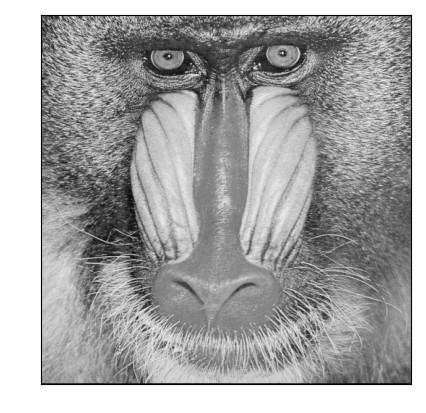

In [3]:
#画像をグレースケールで読み込み
gray_img = cv2.imread('./mandrill.tiff', 0 )
# 画像を表示
plt.imshow(gray_img, cmap = 'gray')
plt.xticks(color="None")#グラフのx 軸を消去
plt.yticks(color="None")#グラフのy 軸を消去
plt.tick_params(length=0)#グラフの目盛りを消去
plt.show()

## フーリエ変換
さっそく，この画像にフーリエ変換をかけてみて，ゼロ周波数成分をスペクトルの中心となるよう移動させ，表示させましょう．  
中心が直流成分にあたります．自然画像は直流成分が多いので，中心が明るいグラフになるかと思います．

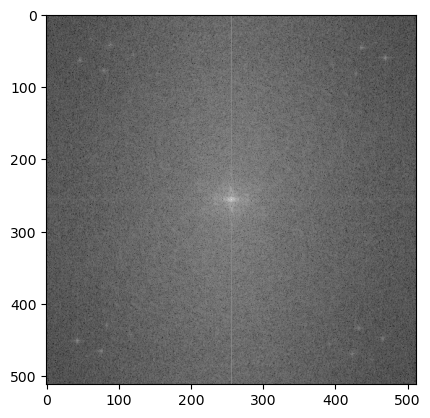

In [4]:
#フーリエ変換をかけてみる
img_fft = fft.fft2( gray_img )

#ゼロ周波数成分をスペクトルの中心に移動
img_fft_shift = fft.fftshift( img_fft )
#描画用にパワースペクトラムを計算する
#そのままだと値が小さすぎて表示しても真っ暗なので，log スケールに変更
mag = np.log( np.abs( ( img_fft_shift ) ) )
#パワースペクトラムを出力
plt.imshow(mag, cmap = 'gray' )
plt.show()

## フーリエ逆変換
フーリエ変換した画像を逆変換することで元に戻してみましょう．フーリエ逆変換すると，実部と虚部が計算されますが，出力するのは実部のみです．

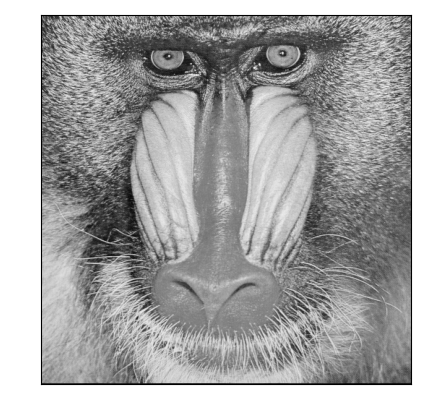

In [5]:
img_fft_= fft.fftshift( img_fft_shift )
#フーリエ逆変換
img_ifft = fft.ifft2( img_fft_ )
#実部だけを取って来て，表示のためunsigned int に変換して表示
plt.imshow( np.uint8( img_ifft.real ), cmap = 'gray' )
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.show()

## ローパスフィルタの作成（課題）
ここで，ローパスフィルタを生成する関数を皆さんに実際に用意してもらいます．
ローパスフィルタは，周波数空間上で中心近くの値を保存し，それ以外の値を0もしくは0に近くなるような計算をするフィルタです.  
今回は，フィルタの中心からの距離がradius 未満のものを1,それ以外を0 の値を持つフィルタを作成しましょう．  
以下のlowpass_filter2D のfilter_shape にはフィルタの大きさ（2次元tupleで表現），raduis は値を1にするときのフィルタからの中心の距離とします．この関数を完成させて下さい．
**この関数はループを使わずに完成させて下さい．ループを使った場合減点です．**

In [6]:
#ローパスフィルタ（円型フィルタの生成）
def lowpass_filter2D( filter_shape, radius ):
    #ここに計算を入れて下さい（現在，エラーが出ないようにnp.zeros を入れていますが，消してもらってOKです．）
    #複数行にわたっても構いませんし，新しい変数を用いてもよいです．
    h, w = filter_shape
    x = np.arange(w) - (w//2)
    y = np.arange(h) - (h//2)
    xx, yy = np.meshgrid(x, y)
    dist = np.sqrt(xx*xx + yy*yy)
    low_f = (dist < radius).astype(int)
    return low_f

lowpass_filter2Dが正しいと，下のデバグ用コードを実行すると，正方形の中心に半径100の白い円が描画されます．

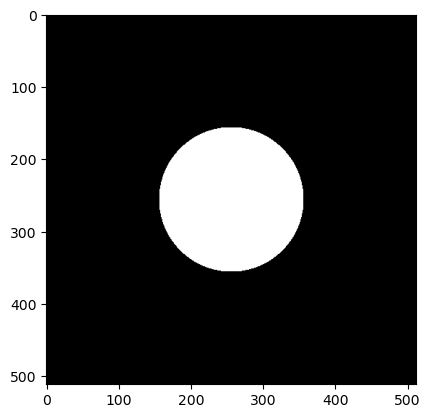

In [7]:
#デバグ用コード
low_filter = lowpass_filter2D( gray_img.shape, 100 )
plt.imshow( low_filter, cmap = 'gray')
plt.show()

## 画像にローパスフィルタを適用（課題）
それでは，上記のローパスフィルタを実際に画像に適用させてみましょう．画像に対して，フーリエ変換を行い，fft.fftshift を使ってゼロ周波数成分をスペクトルの中心に移動させた後，ローパスフィルタとの積を取ります．その結果を再びfft.fftshift関数を使って元に戻し， 逆フーリエ変換をかけた結果の実部を出力して下さい．  
radius = 20, 40, 60, 80, 100 の時の5通りを行って，それぞれ画像を出力し，出力された画像がどのように変化したか見てみましょう．

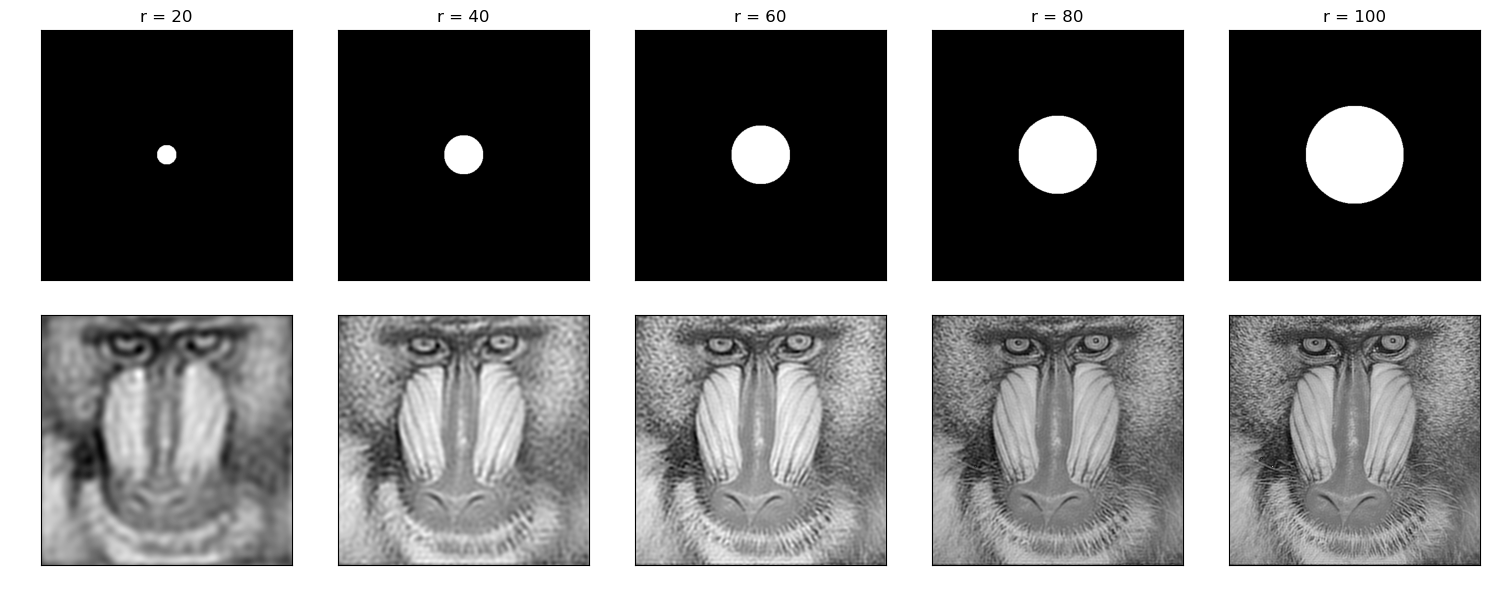

In [11]:
figure = plt.figure(figsize=(15, 6))
for i in range( 5 ):
    low_f = lowpass_filter2D( gray_img.shape, 20*(i+1) )
    plt.subplot( 2, 5, i+1 )
    plt.imshow( low_f, cmap = 'gray' )
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.title( 'r = ' + str(  20*(i+1) ) )

    plt.subplot( 2, 5,  6+i )
    #ここに画像をフーリエ変換した結果に対してローパスフィルタを施し，それを逆変換した画像を表示するコードを入れる．
    #複数行にわたってもよい．新しい変数を使ってもよい．
    #フーリエ変換をかけてみる
    img_fft = fft.fft2( gray_img )
    #ゼロ周波数成分をスペクトルの中心に移動
    img_fft_shift = fft.fftshift( img_fft )
    #img_fft_= fft.fftshift( img_fft_shift )
    figure = img_fft_shift*low_f
    figure2 = fft.fftshift( figure )
    #フーリエ逆変換
    img_ifft = fft.ifft2( figure2 )
    #実部だけを取って来て，表示のためunsigned int に変換して表示
    plt.imshow( np.uint8( img_ifft.real ), cmap = 'gray' )
    
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
plt.tight_layout()
plt.show()

# 識別境界の描画（scikit-learnの演習）
今度はscikit-learnの演習で，2クラス識別問題を解いてみましょう．線形判別分析，SVM（linaer, rbfカーネル），Neural Network を使って，これらを学習した際の識別境界を実際に表示させてみましょう．

## モジュールの読み込み
scikit-learnの中で今回使うサブモジュールだけをimport  していきます．

In [15]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from matplotlib.colors import ListedColormap

## 学習，テストサンプルをプロット
今回用いるデータはscikit-learnの中に用意されているデータセット生成モジュールを用いて作成します．
make_circles という関数でサンプルデータを生成します．  
以下では生成を行ったあと，2クラスを青と赤，テストデータを透明度をあげた状態としてプロットします．

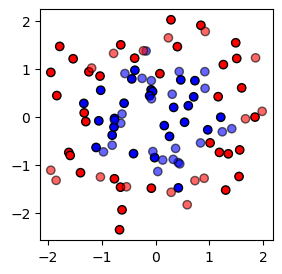

In [16]:
#グラフ描画のためのカラー設定
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

#円状のサンプルデータを作成
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
# StandardScaler().fit_transform によりデータを標準化
X = StandardScaler().fit_transform(X)
#学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
figure = plt.figure( figsize = (3, 3 ) )
# 学習データをプロット
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# テストデータをプロット
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
#表示
plt.show()

## 線形判別式（LDA）を用いて，識別境界を出力
それでは，上のデータを用いて実際に線形判別式を使って識別境界がどうなっているか見ていきましょう．
学習データを用いて識別境界を学習し，識別境界からどの程度離れているかを等高線を描画する関数plt.contourfを用いて描画していきます． 

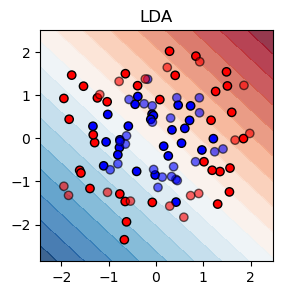

In [17]:
#識別境界のマップを書くための準備
h = .02 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#学習データを用いて識別境界を決定
lda = LinearDiscriminantAnalysis().fit( X_train, y_train )

#決定境界の等高線プロット
figure = plt.figure( figsize = (3, 3 ) )
Z = lda.decision_function( np.c_[xx.ravel(), yy.ravel()] )
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, 20, cmap=cm, alpha=.8)

#学習，テストデータのプロット（上と同じ）
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

#グラフのタイトル
plt.title( 'LDA' )
plt.show()

線形判別式なので，円のような分布のデータはうまく分類が出来ていないことが分かるかと思います．

## Linear SVM, rbf SVM, Neural Network での識別境界の表示（課題）
それでは，ここからは皆さんにLinear SVM, rbf SVM, Neural Networkを用いて学習を行い，識別境界の様子をLDA と同様に表示してもらいます．
LDA にならって，以下のコードのコメント欄の指示に合わせて，Linear SVM, rbf SVM, Neural Networkの学習と識別境界のプロットのコードを記入して下さい．現在の出力結果は学習，テストデータをプロットしたのみです．

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


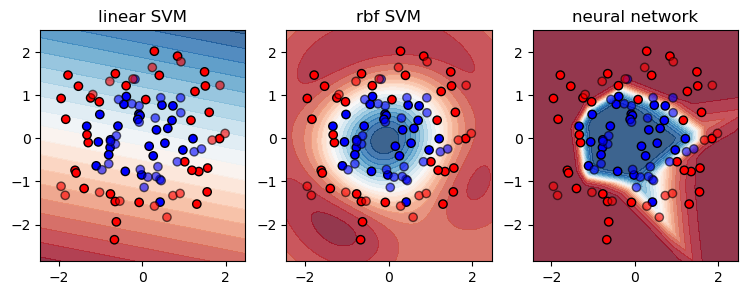

In [23]:
figure = plt.figure( figsize = ( 9, 3 ) )

plt.subplot( 1, 3, 1 )
#Linear SVMの識別境界の描画のコードを書く
linear = SVC(kernel='linear').fit(X_train, y_train)
Z = linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, 20, cmap=cm, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.title( 'linear SVM' )

plt.subplot( 1, 3, 2 )
#rbf SVMの識別境界の描画のコードを書く
rbf = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
Z = rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, 20, cmap=cm, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.title( 'rbf SVM' )

plt.subplot( 1, 3, 3 )
#neural network の識別境界の描画のコードを書く
nn = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=1).fit(X_train, y_train)
Z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, 20, cmap=cm, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
plt.title( 'neural network' )

plt.show()

## 課題の感想等の記入
課題の感想等を記入して下さい．以下のセルの設定をMarkdown 形式にして記入して頂いても構いません．

**お疲れ様でした!!!**  
すべてのセルを実行し，結果が出力された状態で保存して，ファイル名のXXX の部分を学籍番号に変えて.ipynb ファイルを[moodle](https://lms.omu.ac.jp/mod/assign/view.php?id=1399063)に提出して下さい．  
締切は7/16 23:59です．